<a href="https://colab.research.google.com/github/mcalestino/Quantum-Black-Hole-Modeling/blob/main/QuntumClockipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 81.5 MB/s eta 0:00:00


In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [7]:
# ---- Simulate paramters ---
# We set the speed of light c+1 for simplicity
c = 1.0

In [25]:
# The rotaional angle for one tick of a stationary clock
PROPER_TICK_ANGEL = np.pi / 16

# Velocities to compare as a fracytion of c
velocities = [0.0, 0.8]

# Total time steps for the observer
TOTAL_STEPS = 150


In [8]:
dev = qml.device("default.qubit", wires = 1)

In [24]:
# --- Physics Helper Function ----
def lorenz_factor(v, c_light):
  "Calculates Lorenz Factor Gamma"
  if v >= c_light:
    return np.inf  # Prevent division by zero for v = c
  return 1/np.sqrt(1 - (v**2 / c_light))


In [19]:
# --- Qunatum Clock Circuit ----
@qml.qnode(dev)
def quantum_clock_circuit(steps, velocity):
  "Evolves a qubit clock for a number of steps at a given velocity"
  #Calculate the dilated tick angle basaed on velocity
  gamma = lorenz_factor(velocity, c)
  dilated_angle = PROPER_TICK_ANGEL * gamma

  #Apply the ticks
  for _ in range(steps):
    qml.RX(dilated_angle, wires = 0)

  # Return the expectation value to read the clock's state
  return qml.expval(qml.PauliZ(0))

In [35]:
# ---- Run the Simulation ----
# Ensure cell w_EXAHzjIzO_ is executed before this cell to define the 'velocities' variable.
results = {}
for v in velocities:
  print(f"Simulating clock at v = {v}c ...")
  #store the clocks state at each observer time step
  clock_readings = []
  for step in range(TOTAL_STEPS):
    reading = quantum_clock_circuit(steps = step, velocity = v)
    clock_readings.append(reading)
  results[v] = clock_readings

Simulating clock at v = 0.0c ...
Simulating clock at v = 0.8c ...


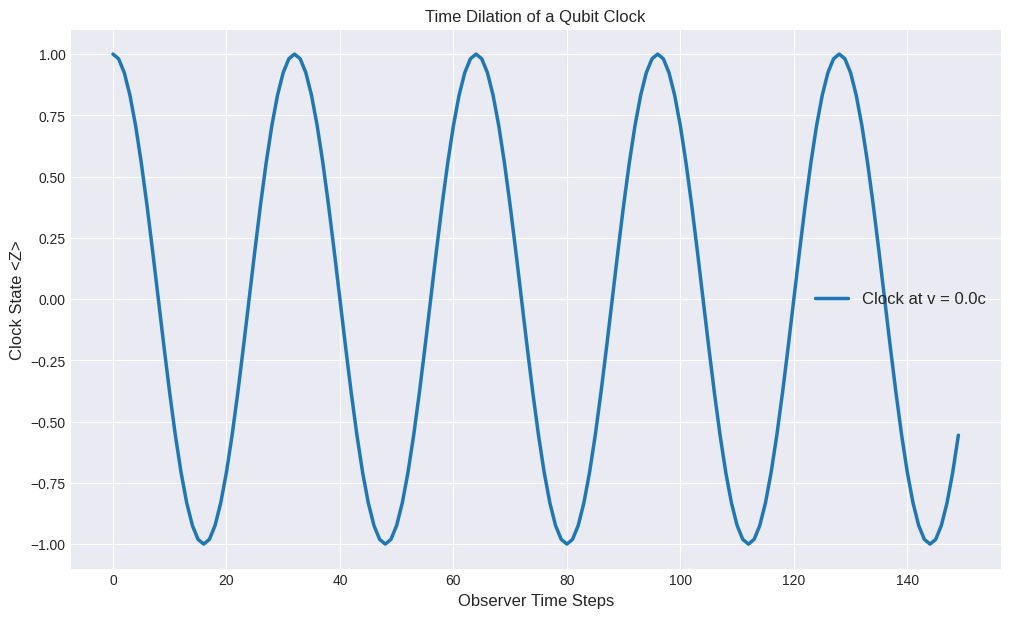

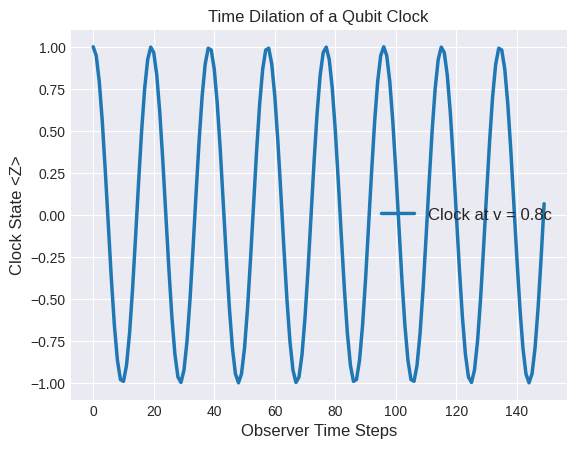

In [37]:
# --- Plot the Results ----
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize = (12,7))

for v, readings in results.items():
  plt.plot(range(TOTAL_STEPS), readings, label = f'Clock at v = {v}c', lw = 2.5)

  plt.title("Time Dilation of a Qubit Clock")
  plt.xlabel("Observer Time Steps", fontsize = 12)
  plt.ylabel("Clock State <Z>", fontsize = 12)
  plt.ylim(-1.1, 1.1)
  plt.legend(fontsize = 12)
  plt.grid(True)
  plt.show()